<a href="https://colab.research.google.com/github/JosephHerreraDev/mineria_de_datos/blob/main/Conociendo_tus_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
sns.set()

In [ ]:
df = pd.read_csv('iris.csv')

In [ ]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df[df.duplicated()]

,sepal length,sepal width,petal length,petal width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: title={'center': 'Elementos por clase'}, xlabel='count', ylabel='class'>

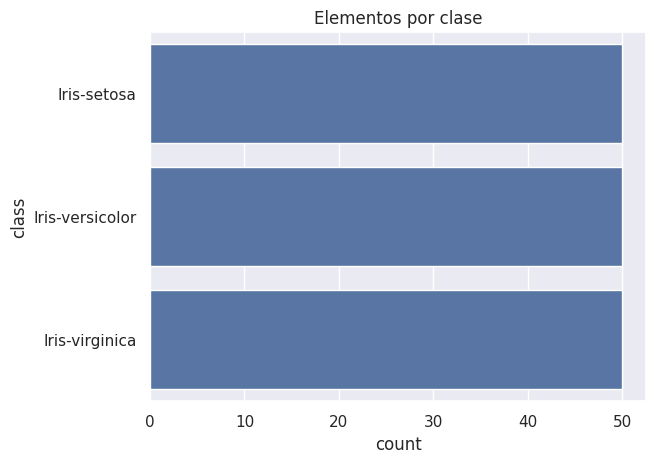

In [ ]:
plt.title("Elementos por clase")
sns.countplot(df['class'])

<Axes: xlabel='sepal length', ylabel='sepal length'>

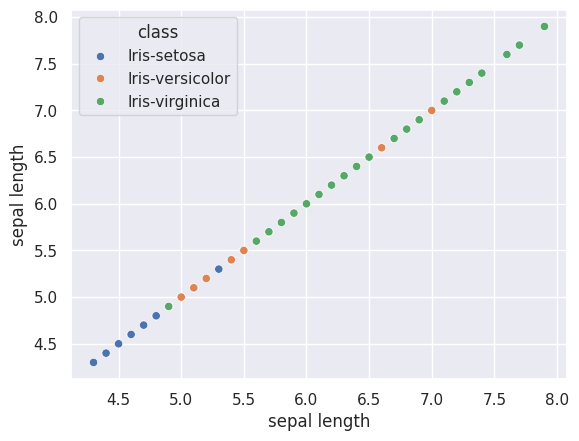

In [ ]:
sns.scatterplot(x=df["sepal length"],y=df["sepal length"],hue=df["class"])

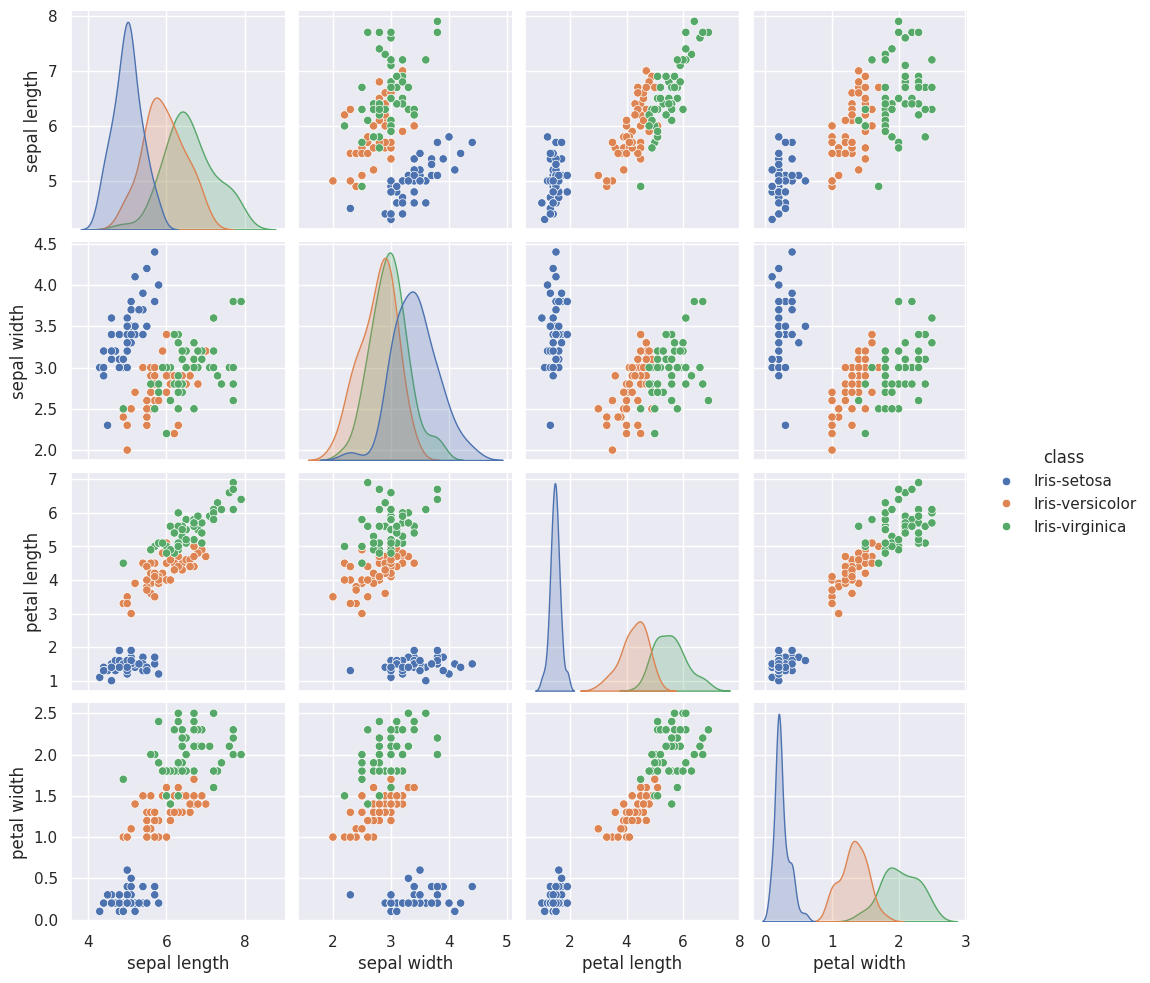

In [ ]:
sns.pairplot(df, hue='class')

<Axes: >

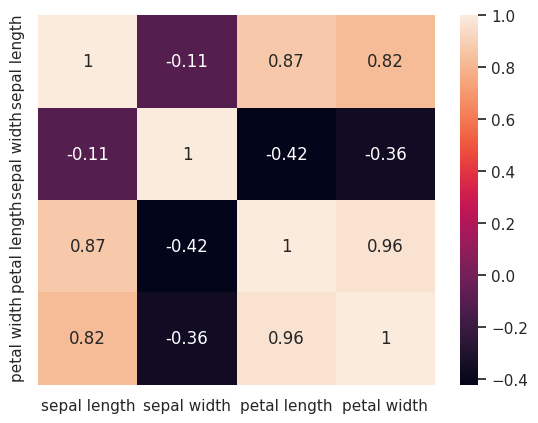

In [ ]:
plt.figure()
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
df.groupby("class").agg(['mean','median'])

sepal length        sepal width        petal length         \
                        mean median        mean median         mean median   
class                                                                        
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                petal width         
                       mean median  
class                               
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

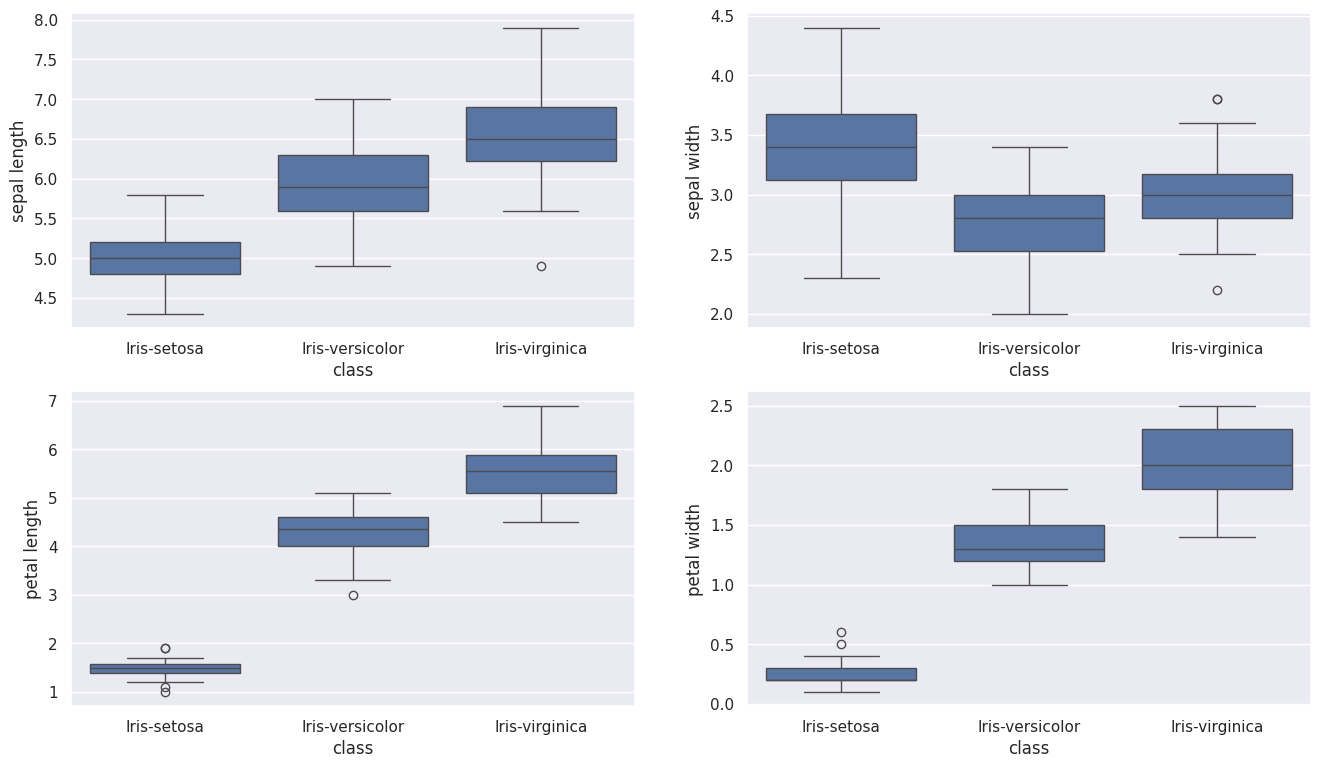

In [ ]:
fig, axes=plt.subplots(2, 2, figsize=(16, 9))
sns.boxplot(y='sepal length', x='class', data=df, orient='v',ax=axes[0,0])
sns.boxplot(y='sepal width', x='class', data=df, orient='v',ax=axes[0,1])
sns.boxplot(y='petal length', x='class', data=df, orient='v',ax=axes[1,0])
sns.boxplot(y='petal width', x='class', data=df, orient='v',ax=axes[1,1])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

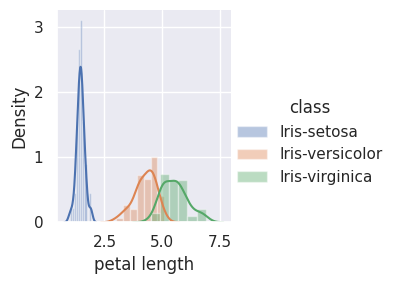

In [ ]:
sns.FacetGrid(df,hue='class').map(sns.distplot, 'petal length').add_legend()
plt.show()

In [ ]:
def Clasificador_IF_THEN_ELSE():
  Clasificacion = []
  for i in df['petal length']:
    if i <= 2.5:
      Clasificacion.append('Iris-setosa')
    else:
      if i<=4.8:
        Clasificacion.append('Iris-versicolor')
      else:
        Clasificacion.append('Iris-virginica')
  return Clasificacion

In [ ]:
aciertos=sum(x==y for x,y in zip(df['class'],Clasificador_IF_THEN_ELSE()))

In [ ]:
print('Rendimiento: ',aciertos/len(df['class'])*100,"%")

Rendimiento:  95.33333333333334 %


In [ ]:
df.cov(numeric_only=True)

,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x = df.drop("class", axis=1)
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
x_normal = StandardScaler().fit_transform(x)
x_normal

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [ ]:
df_normal = pd.DataFrame(x_normal, columns=x.columns)
df_normal

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [ ]:
df_normal['sepal length'].var()

1.0067114093959733

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)

In [ ]:
principalComponents = pca.fit_transform(x_normal)

In [ ]:
pca.get_covariance()

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
df.cov(numeric_only=True)

,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [ ]:
df_normal.cov(numeric_only=True)

,sepal length,sepal width,petal length,petal width
sepal length,1.006711,-0.110103,0.877605,0.823443
sepal width,-0.110103,1.006711,-0.423338,-0.358937
petal length,0.877605,-0.423338,1.006711,0.969219
petal width,0.823443,-0.358937,0.969219,1.006711


In [ ]:
principalComponents

array([[-2.26454173e+00,  5.05703903e-01, -1.21943348e-01],
       [-2.08642550e+00, -6.55404729e-01, -2.27250832e-01],
       [-2.36795045e+00, -3.18477311e-01,  5.14796236e-02],
       [-2.30419716e+00, -5.75367713e-01,  9.88604444e-02],
       [-2.38877749e+00,  6.74767397e-01,  2.14278490e-02],
       [-2.07053681e+00,  1.51854856e+00,  3.06842583e-02],
       [-2.44571134e+00,  7.45626750e-02,  3.42197636e-01],
       [-2.23384186e+00,  2.47613932e-01, -8.25744645e-02],
       [-2.34195768e+00, -1.09514636e+00,  1.53562399e-01],
       [-2.18867576e+00, -4.48629048e-01, -2.46559522e-01],
       [-2.16348656e+00,  1.07059558e+00, -2.64009373e-01],
       [-2.32737775e+00,  1.58587455e-01,  1.00165616e-01],
       [-2.22408272e+00, -7.09118158e-01, -2.23214514e-01],
       [-2.63971626e+00, -9.38281982e-01,  1.89570030e-01],
       [-2.19229151e+00,  1.88997851e+00, -4.69480095e-01],
       [-2.25146521e+00,  2.72237108e+00,  3.26037967e-02],
       [-2.20275048e+00,  1.51375028e+00

In [ ]:
principal_df = pd.DataFrame(data = principalComponents, columns = ['pc 1', 'pc 2','pc 3'])
principal_df

,pc 1,pc 2,pc 3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428
...,...,...,...
145,1.870522,0.382822,0.254532
146,1.558492,-0.905314,-0.025382
147,1.520845,0.266795,0.179277
148,1.376391,1.016362,0.931405


In [ ]:
final_df = pd.concat([principal_df, df[['class']]], axis = 1)
final_df

,pc 1,pc 2,pc 3,class
0,-2.264542,0.505704,-0.121943,Iris-setosa
1,-2.086426,-0.655405,-0.227251,Iris-setosa
2,-2.367950,-0.318477,0.051480,Iris-setosa
3,-2.304197,-0.575368,0.098860,Iris-setosa
4,-2.388777,0.674767,0.021428,Iris-setosa
...,...,...,...,...
145,1.870522,0.382822,0.254532,Iris-virginica
146,1.558492,-0.905314,-0.025382,Iris-virginica
147,1.520845,0.266795,0.179277,Iris-virginica
148,1.376391,1.016362,0.931405,Iris-virginica


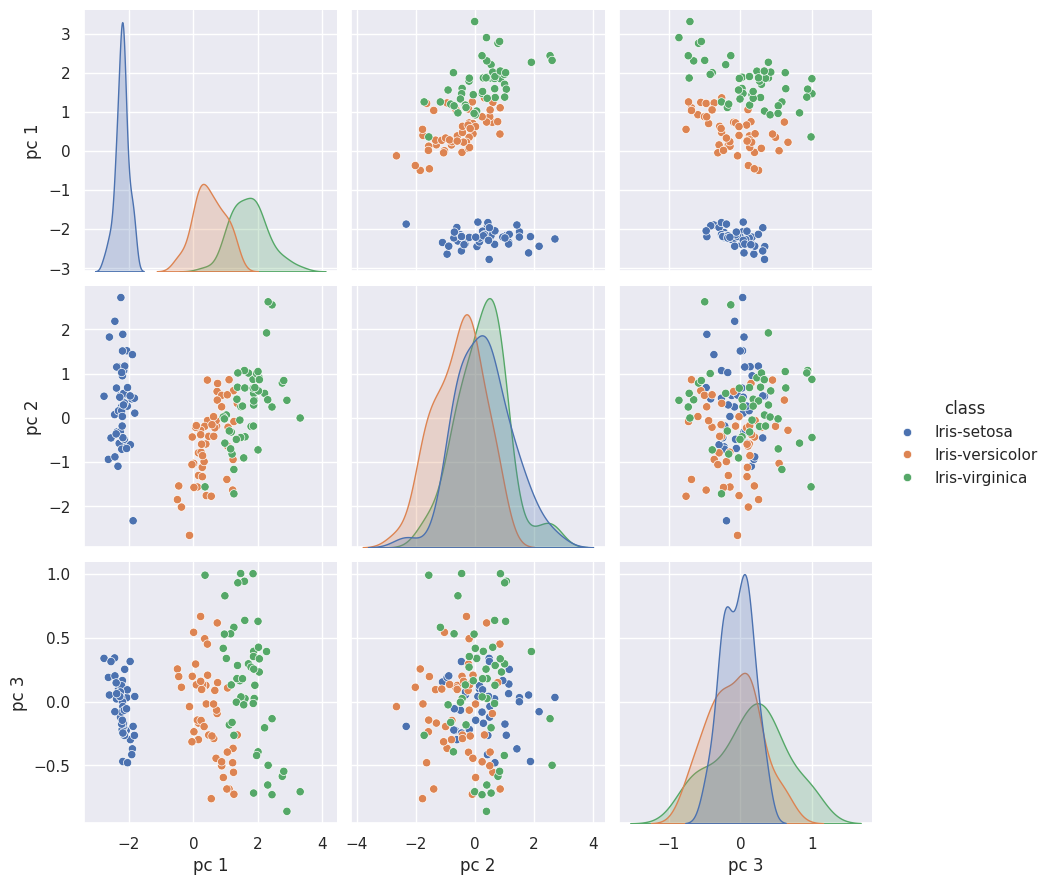

In [ ]:
sns.pairplot(final_df, hue='class', height=3)

In [ ]:
informacion_varianza = pca.explained_variance_ratio_
informacion_varianza

array([0.72770452, 0.23030523, 0.03683832])

Text(0.5, 0, 'Principal Component')

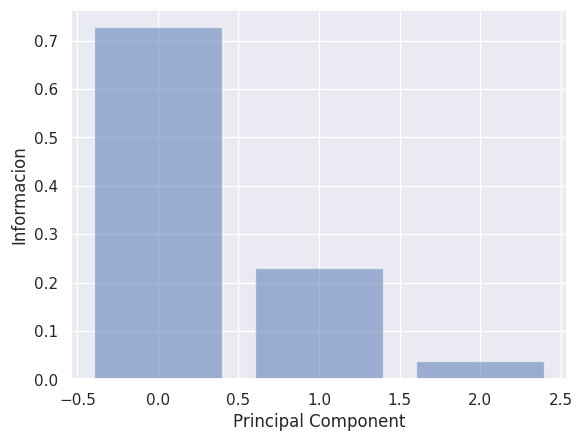

In [ ]:
plt.figure()
plt.bar(range(3), informacion_varianza, alpha=0.5, align='center')
plt.ylabel('Informacion')
plt.xlabel('Principal Component')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
etiquetas = label_encoder.fit_transform(final_df['class'])
etiquetas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.neural_network import MLPClassifier
data_training = final_df.drop('class', axis=1)
clasificador = MLPClassifier(solver='lbfgs', alpha=0.0001, hidden_layer_sizes=(100, 50, 10), random_state=1)
clasificador.fit(data_training, etiquetas)

MLPClassifier(hidden_layer_sizes=(100, 50, 10), random_state=1, solver='lbfgs')

In [ ]:
clasificador.score(data_training, etiquetas)

1.0